# Image Deblurring - June Exam

# Assignment
## Task 

The task consists of creating a deep learning model to detect hate speech or offensive language in texts. Try to build a pipeline which is able to perform the task and evaluate the results obtained. Make sure to test the model in order to prove robustness and lack of overfitting. 

The metric you will need to use to evaluate the results is the *MSE*. The metrics will be evaluated on the reconstructed images, so provide a way to check the results on a batch composed of original images and reconstructed images.

## Dataset
The dataset is built starting from *CIFAR-10* images collection. Feel free to further split the data to build a validation set, if needed. The split into different data split is left to you, perform it as you like, making sure it is meaningful.

### Dataset creation - DO NOT MODIFY

In [1]:
import tensorflow as tf 
import random
from cv2 import GaussianBlur
import numpy as np

def getDataset():
    (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
    normalize = lambda x: x/x.max()
    x_train = normalize(x_train)
    x_test = normalize(x_test)
    createBlurred = lambda arr: np.array([GaussianBlur(x, (5,5), ((random.random()*3)+1)) + (0.02*np.random.normal(0,1, (32, 32, 3))) for x in arr])
    return (createBlurred(x_train), x_train), (createBlurred(x_test), x_test)

# Solution
## Data visualization


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [3]:
(x_train, y_train), (x_test, y_test) = getDataset()

In [4]:
print(f'The shape of the x_train dataset is: {x_train.shape}')
print(f'The shape of the y_train dataset is: {y_train.shape}')

print(f'The shape of the x_test dataset is: {x_test.shape}')
print(f'The shape of the y_test dataset is: {y_test.shape}')

The shape of the x_train dataset is: (50000, 32, 32, 3)
The shape of the y_train dataset is: (50000, 32, 32, 3)
The shape of the x_test dataset is: (10000, 32, 32, 3)
The shape of the y_test dataset is: (10000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


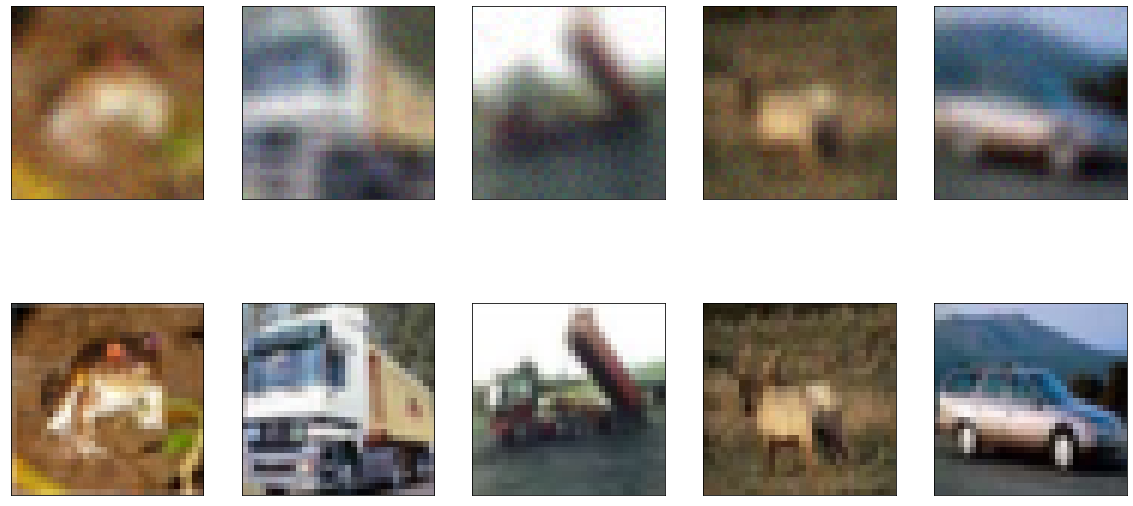

In [5]:
def plot_first_images(n_images_to_plot=5):
    plt.figure(figsize=(20, 10))
    for i in range(n_images_to_plot):
        # Display blurrd image
        ax = plt.subplot(2, n_images_to_plot, i + 1)
        plt.imshow(x_train[i], vmin=0., vmax=1.)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed image
        ax = plt.subplot(2, n_images_to_plot, i + 1 + n_images_to_plot)
        plt.imshow(y_train[i], vmin=0., vmax=1.)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
plot_first_images()

In [6]:
input_shape = x_train.shape[1:]

from tensorflow.keras.initializers import RandomNormal

initializer = RandomNormal(mean=0, stddev=1)

# Encoder
input_layer = layers.Input(shape=(input_shape))

x = layers.Conv2D(16, (3, 3), activation='swish', padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='swish', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(32, kernel_size=(1,1), strides=(2,2), padding='same', activation='swish')(x)
x = layers.Conv2D(32, (3, 3), activation='swish', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(16, kernel_size=(1,1), strides=(2,2), padding='same', activation='swish')(x)
decoded = layers.Conv2D(3, (3, 3), activation='swish', padding='same')(x)

# Autoencoder
autoencoder = Model(input_layer, decoded)

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128   

In [8]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=adam, loss='mse')

In [9]:
autoencoder.fit(x_train, y_train,
                validation_split=0.2,
                epochs=20,
                batch_size=64)

Epoch 1/20
625/625 [==============================] - 18s 12ms/step - loss: 0.0217 - val_loss: 0.0112
Epoch 2/20
625/625 [==============================] - 5s 7ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 4/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 5/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 6/20
625/625 [==============================] - 5s 7ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 8/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 9/20
625/625 [==============================] - 5s 7ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 10/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0050 - val_loss: 0.00